# Perceptions of Probability and Numbers

* [Options that work](#Options-that-work)
 * [Box Plot](#Box-Plot)
 * [Box Plot with points](#Box-Plot-with-points)
 * [Violin Plot](#Violin-Plot)
 * [Ridgeline Plot](#Ridgeline-Plot)
* [Options that don't work](#Options-that-don't-work)
 * [Density Plot](#Density-Plot)
 * [Histogram](#Histogram)

This notebook presents a few alternatives to visualize a dataset composed of a numeric and a categoric variable.

The raw data comes from responses to the following question:
    
*What* ***probability or number*** *would you assign to the* ***phrase*** *?*

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import numpy as np
from joypy import joyplot

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), 'input', 'people_perception.csv'))
df = pd.melt(df, var_name='phrase', value_name='probability')
df.sample(5).reset_index(drop = True)

,phrase,probability
0,We Doubt,60.0
1,About Even,50.0
2,Improbable,50.0
3,Highly Likely,75.0
4,We Believe,60.0


Getting a subset of phrases and removing outliers.

In [3]:
columns_subset = ['Almost Certainly', 'Highly Likely', 'Probable', 'Likely','Very Good Chance', 
                 'We Believe',  'About Even', 'Unlikely', 'Probably Not']
df = df.loc[df['phrase'].isin(columns_subset)]

#  Upon inspection there was a clear outlier for 'Highly Likely'
idxmin = df.loc[df['phrase'] == 'Highly Likely', 'probability'].idxmin()
df.drop(idxmin, axis = 0, inplace = True)

#  Upon inspection there was a clear outlier for 'Probably Not' = 100 
idxmax = df.loc[df['phrase'] == 'Probably Not', 'probability'].idxmax()
df.drop(idxmax, axis = 0, inplace = True)

order = list(df.groupby('phrase').mean().sort_values(by='probability', ascending = False).index)

# Options that work

## Box Plot

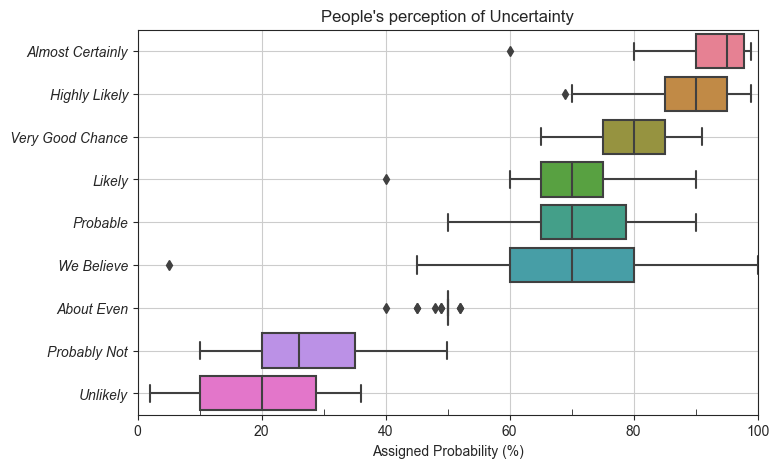

In [4]:
sns.set_style("ticks")
color_pal = sns.color_palette("husl", 9)
fig, ax = plt.subplots(figsize = (8,5))   
ax = sns.boxplot(df, x = 'probability', y = 'phrase', ax=ax, order = order, palette = color_pal)

# Aesthetics
def style_axes(ax):
    ax.set_ylabel('')
    ax.set_yticklabels(labels = ax.get_yticklabels(), style='italic', fontfamily = 'Arial')
    ax.set_title("People's perception of Uncertainty")
    ax.set_xticks(range(10,91,10), minor= True)
    ax.tick_params(axis='x', which='minor', length = 4, direction="in")
    ax.set_xlabel('Assigned Probability (%)')
    ax.grid()
    ax.set_xlim(0,100)
    
style_axes(ax)

## Box Plot with points

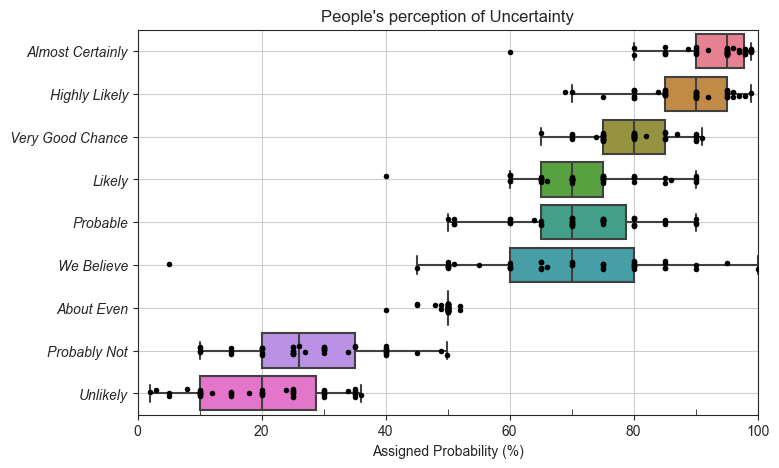

In [5]:
fig, ax = plt.subplots(figsize = (8,5))    
ax = sns.boxplot(df, x = 'probability', y = 'phrase', ax=ax, order=order, palette=color_pal, fliersize = 0)
ax = sns.stripplot(data=df, x="probability", y="phrase", ax = ax, order=order, jitter = True, size = 4, color="black");

style_axes(ax)

## Violin lot

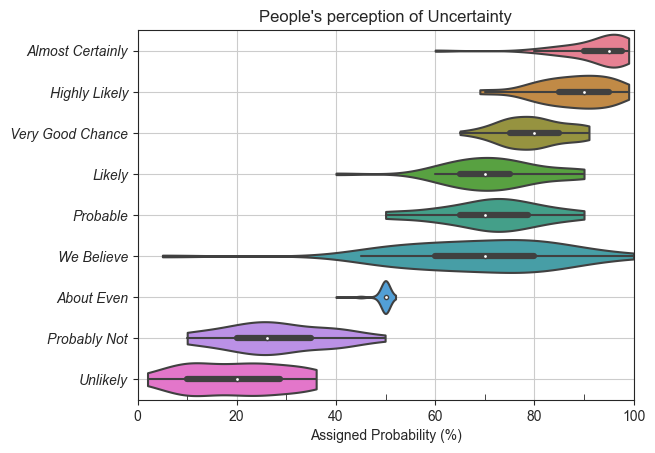

In [6]:
fig, ax = plt.subplots()   
ax = sns.violinplot(df, x = 'probability', y = 'phrase', cut = 0. , inner = 'box', 
                    scale = 'width', ax= ax, order = order, palette = color_pal,
                    alpha = 0.5)

# Aesthetics
style_axes(ax)

## Ridgeline Plot

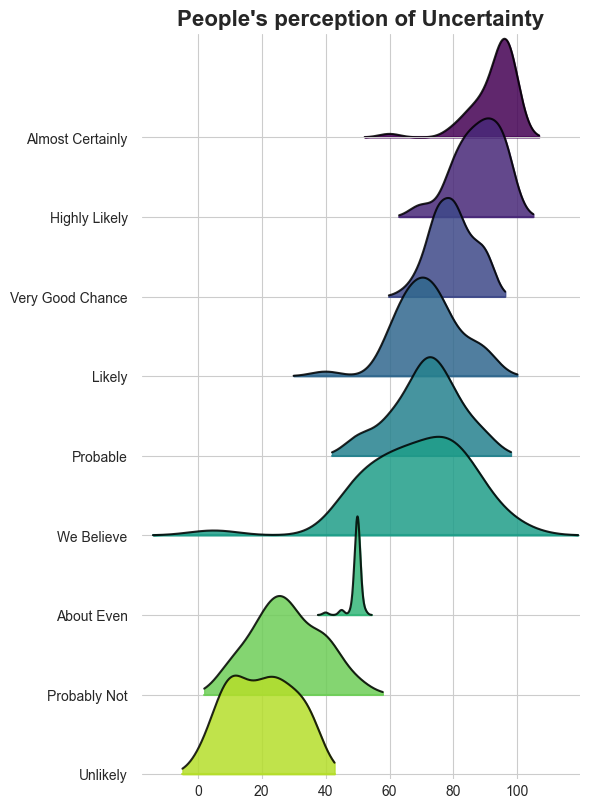

In [7]:
from pandas.api.types import CategoricalDtype
cat_phrase = CategoricalDtype(order, ordered=True)

df['phrase'] = df['phrase'].astype(cat_phrase)
df.sort_values(by='phrase', inplace=True)

# Plotting
n = len(cat_phrase.categories)
fig, ax = joyplot(data=df, by='phrase',legend=False, grid=True,
                  alpha=0.85, linecolor="black", figsize=(6, 8), ylim='own', overlap=0.5, range_style='own',
                 colormap= mpl.cm.get_cmap(name='viridis'));

plt.title("People's perception of Uncertainty", fontweight = 'bold', fontsize=16)
plt.show()

# Options that don't work

## Density Plot

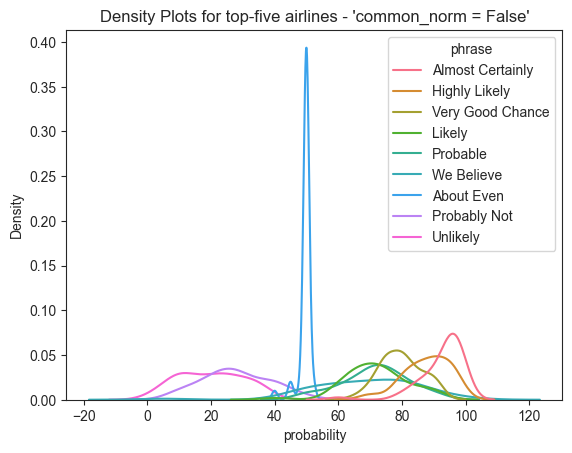

In [8]:
fig, ax = plt.subplots()
ax = sns.kdeplot(data = df, x = "probability", 
                 hue = 'phrase', palette = color_pal, ax = ax, common_norm = False)
ax.set_title("Density Plots for top-five airlines - 'common_norm = False'");

## Histogram

This is a good way to study the distribution of each group separately. However, it makes it hard to compare groups.

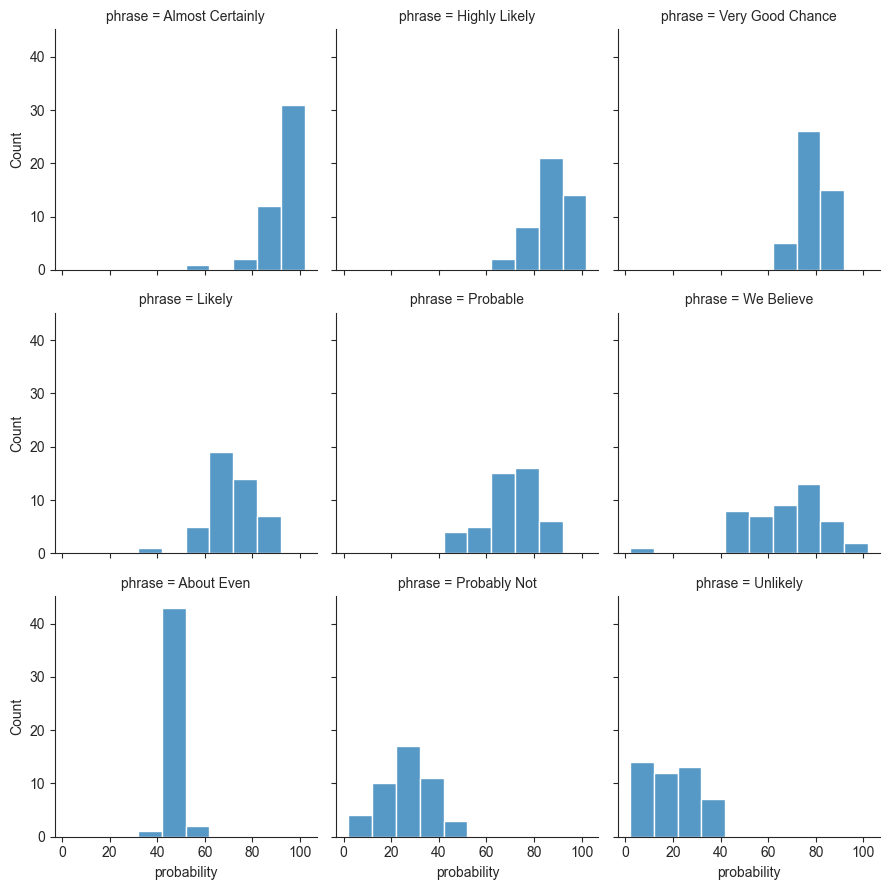

In [9]:
sns.displot(df, x="probability", col="phrase", col_wrap = 3, kind="hist", binwidth=10, 
            height=3, facet_kws=dict(margin_titles=True))